In [17]:
# data : 20240201
# desc :  k-최근접 이웃 알고리즘

In [18]:
import numpy as np
from sklearn import neighbors 
import pandas as pd
from matplotlib import colors as c
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [19]:
# 예제 데이터 로드
mydata = pd.read_csv('../mydata.csv') # 데이터 위치에서 데이터 불러오기
print(mydata.head()) # 로드 데이터 확인

         TM  CA_TOT  HM_AVG  RN_DAY
0  20150101     3.4    51.1     0.1
1  20150102     3.1    53.6     0.0
2  20150103     3.7    59.6    -9.0
3  20150104     3.1    68.8    -9.0
4  20150105     6.5    79.4     2.0


In [20]:
# 데이터 정제
mydata.loc[mydata['RN_DAY'] <= 0, 'RN_DAY'] = 0 # 강수량 0mm 이하(결측 포함)에 0 입력
mydata.loc[mydata['RN_DAY'] > 0, 'RN_DAY'] = 1 # 강수량 0mm 초과에 1 입력
mydata['RN_DAY'] = mydata['RN_DAY'].astype('category') # 강수량 변수 범주형 변환
mydata.loc[mydata['CA_TOT'] == -9, 'CA_TOT'] = 0 # 전운량 결측치(-9)에 0 입력
mydata.loc[mydata['HM_AVG'] == -9, 'HM_AVG'] = 0 # 전운량 결측치(-9)에 0 입력

In [21]:
# 종속변수, 독립변수 설정
X = mydata.iloc[:, 1:3] # 두번째 컬럼(CA_TOT)와 세번째 컬럼(HM_AVG)을 독립변수로 설정
y = mydata['RN_DAY'] # 이분형으로 변환한 강수량 변수를 종속변수로 설정
print(y)

0      1.0
1      0.0
2      0.0
3      0.0
4      1.0
      ... 
360    0.0
361    0.0
362    0.0
363    1.0
364    0.0
Name: RN_DAY, Length: 365, dtype: category
Categories (2, float64): [0.0, 1.0]


In [22]:
# k-최근접 이웃 모델링
kNN = neighbors.KNeighborsClassifier(n_neighbors=3)
kNN.fit(X, y)
Z = kNN.predict(X) # 예측값 산출

In [23]:
# k-최근접 결과
target_names = ['0', '1']
print(classification_report(y, Z, target_names=target_names))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       254
           1       0.85      0.77      0.81       111

    accuracy                           0.89       365
   macro avg       0.88      0.85      0.86       365
weighted avg       0.89      0.89      0.89       365



In [24]:
# 도표 눈금(의사결정 경계를 얼마나 촘촘하게 할 것인지) 설정
plot_step = 0.02

In [25]:
# 경계 그리기
x_min, x_max = X['CA_TOT'].min() - 1, X['CA_TOT'].max() + 1
y_min, y_max = X['HM_AVG'].min() - 1, X['HM_AVG'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),np.arange(y_min, y_max, plot_step))
Z = kNN.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

c:\DEV\Langs\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Text(0, 0.5, 'HM_AVG')

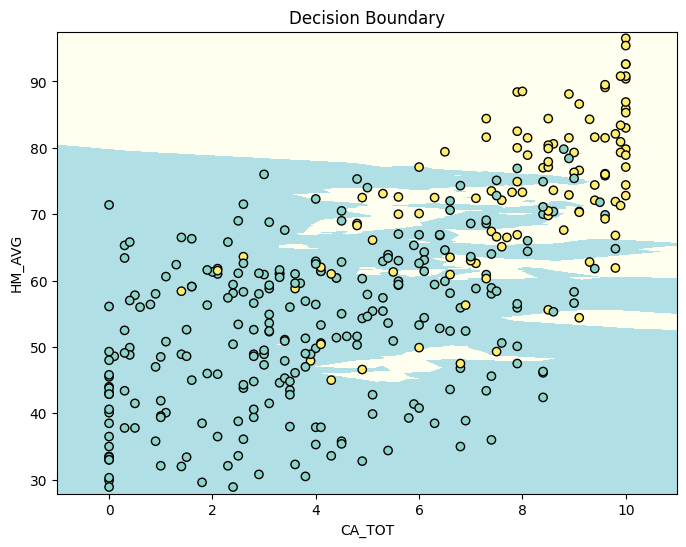

In [30]:
# kNN의 결과를 반영해 색상 입히기
plt.figure(1, figsize=(8, 6))
plt.set_cmap(plt.cm.Paired)
cMap = c.ListedColormap(['powderblue', 'ivory'])
plt.pcolormesh(xx, yy, Z,cmap=cMap)
# 독립변수 시각화
plt.scatter(X['CA_TOT'], X['HM_AVG'], c=y, cmap=plt.cm.Set3, edgecolor='k')
plt.title('Decision Boundary')
plt.xlabel('CA_TOT')
plt.ylabel('HM_AVG')